# estimating length of stick after n breaks of length one stick
Assuming each break is a uniform continuous random variable. each subsequent break is done on the stick from 0 to the previous break and is also a uniform continuous r.v. 

Example with three breaks:  
- Break 1 on [0, 1]: .42
- Break 2 on [0, 0.42]: .11
- Break 3 on [0, 0.11]: .05

As it turns out the expected value of the length of the stick after the nth break can be modelled by:
$$ E[\text{length after n breaks}] = \left(\frac{1}{2}\right)^n.$$

This matches the intuition of uniform random variables where after one break we expect the average length to be 1/2 and continuing on from there. For a rigorous probability theoretic proof of this see [this lecture.](https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-041sc-probabilistic-systems-analysis-and-applied-probability-fall-2013/unit-ii/lecture-9/)

This notebook goes through obtaining this result with a numeric approach.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams["font.size"] = "20"

The functions below handle the breaking of sticks and plotting the length as a function of the break number.

In [4]:
def break_stick(length):
    return np.random.uniform(low=0, high=length)

def break_stick_n_times(length, n):
    current_length = length
    breaks = [] 
    for i in range(n):
        breaks.append(current_length)
        current_length = break_stick(current_length)
    return breaks

def break_m_sticks_n_times(length, n, m):
    sticks = []
    for i in range(m):
        sticks.append(break_stick_n_times(length, n))
    return sticks

def plot_stick(breaks):
    plt.plot(np.arange(len(breaks)), breaks)
    
def plot_all_sticks(sticks):
    for stick in sticks:
        plot_stick(stick)
    plt.xlabel('Break Number')
    plt.ylabel('Length of Stick')
    plt.title('Stick Breaking')
    plt.show()

now we can do some stick breaking and plot the results.

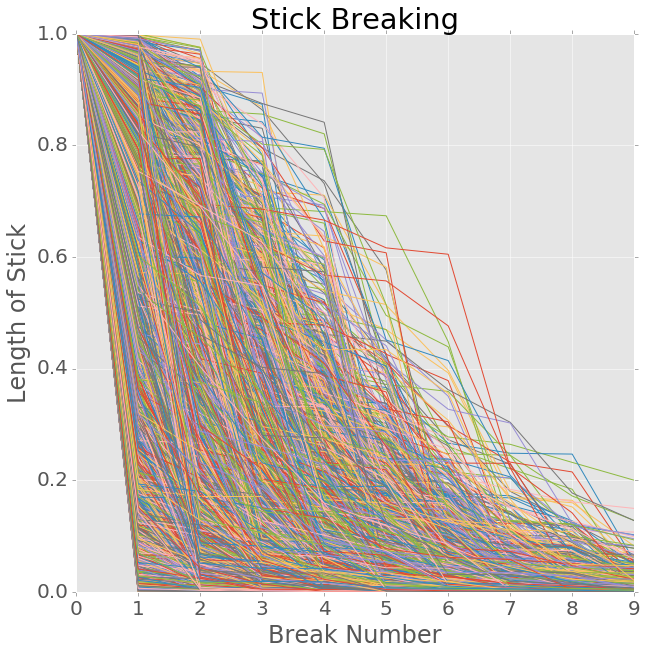

In [5]:
length = 1
number_sticks = 10000
number_breaks = 10
result = np.asarray(break_m_sticks_n_times(length, number_breaks, number_sticks))
plot_all_sticks(result)

that looks dope. the the intersting part is taking the average length of the sticks at each break and plotting that next two our mathematical model of $$y = \left(\frac{1}{2}\right)^x$$

In [6]:
def plot_average_stick(sticks):
    if type(sticks) != np.ndarray:
        sticks = np.asarray(sticks)
    averages = []
    num_breaks = sticks[0].shape[0]
    for i in range(num_breaks):
        averages.append(sticks[:,i].mean())
    plt.plot(np.arange(num_breaks), averages, 'g-.', linewidth=5, alpha=1, label='Average Stick Break')
    x = np.arange(0,9,.01)
    plt.plot(x, (1/2)**x, 'm--', linewidth=5, alpha=.5, label='y=.5^x')
    plt.legend()
    plt.xlabel('Number of breaks')
    plt.ylabel('Length of stick')
    plt.title('Average stick break and y = .5^x')
    plt.show()
    return averages

doens't this make you love numpy arrays?!

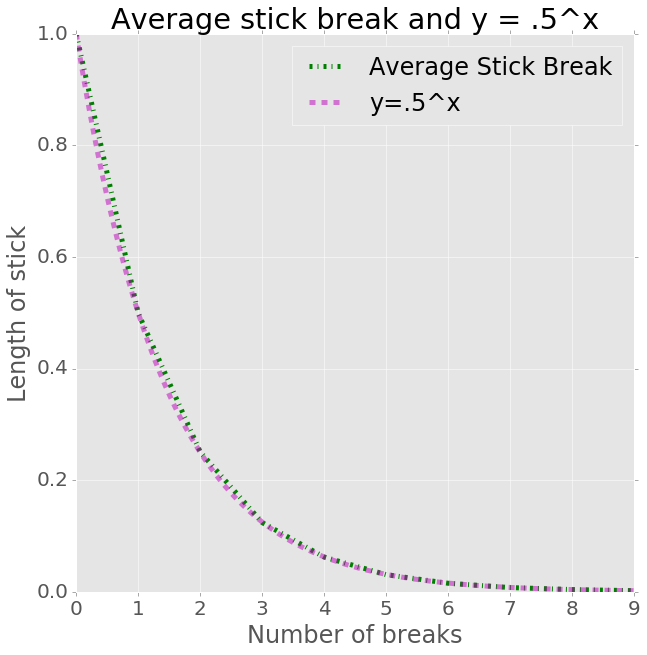

In [7]:
averages = plot_average_stick(result)

seems legit. we can quantify this with the percent error.

In [8]:
def get_percent_error(averages):
    errors = []
    for i in range(len(averages)):
        errors.append(100*abs(averages[i]-(.5**i))/(.5**i))
    return np.asarray(errors)

In [9]:
errors = get_percent_error(averages)
print('the average difference from our prediction and the model is {:.3f}%'.format(errors.mean()))

the average difference from our prediction and the model is 1.173%


I can live with 1.2% error. pretty fun stuff. thanks for reading.